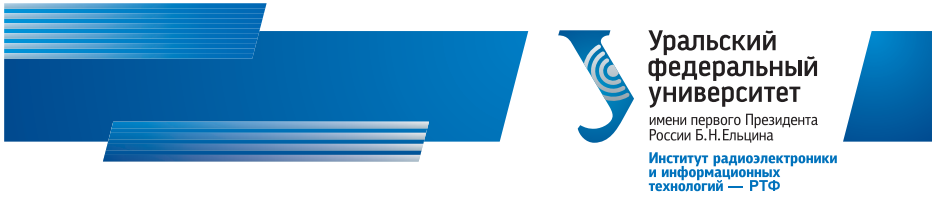


# Основы работы с Apache Spark
##На этом занятии:
0. Установка Apache Spark
1. Общие сведения
2. Область применения
3. Архитектура приложений
4. Базовые функции RDD API
5. Рair RDD функции
6. Работа с данными

# 0. Установка Apache Spark
Скачиваем и устанавливаем необходимое ПО

In [ ]:
# Устанавливаем OpenJDK
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# Закачиваем Spark
!wget -q http://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop2.7.tgz -O spark.tgz
# Распаковываем архив со Spark
!tar xf spark.tgz
# Устанавливаем пакет findspark для работы со Spark из Python
!pip install -q findspark

In [ ]:
!ls

sample_data  spark-3.2.0-bin-hadoop2.7	spark.tgz


Настраиваем переменные окружения для работы с Apache Spark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop2.7"

##Создание сессии Spark
Находим установку Spark

In [ ]:
import findspark
findspark.init()

Подключаем необходимые модули для работы со Spark из Python

In [ ]:
from pyspark.sql import SparkSession

Создаем сессию Spark на локальном компьютере

In [ ]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
!echo 'apple' > sample_data/fruits.txt
!echo 'banana' >> sample_data/fruits.txt
!echo 'canary melon' >> sample_data/fruits.txt
!echo 'grape' >> sample_data/fruits.txt
!echo 'lemon' >> sample_data/fruits.txt
!echo 'orange' >> sample_data/fruits.txt
!echo 'pineapple' >> sample_data/fruits.txt
!echo 'strawberry' >> sample_data/fruits.txt
!echo 'banana' > sample_data/yellowthings.txt
!echo 'bee' >> sample_data/yellowthings.txt
!echo 'butter' >> sample_data/yellowthings.txt
!echo 'canary melon' >> sample_data/yellowthings.txt
!echo 'gold' >> sample_data/yellowthings.txt
!echo 'lemon' >> sample_data/yellowthings.txt
!echo 'pineapple' >> sample_data/yellowthings.txt
!echo 'sunflower' >> sample_data/yellowthings.txt

# 1. Общие сведения
[Apache Spark](https://spark.apache.org/docs/latest/index.html) - это проект с открытым исходным кодом предоставляющий фреймворк для параллельной обработки, поддерживающий вычисления в оперативной памяти для повышенной производительности в приложениях аналитики больших данных.

**Apache Spark** - это:


*   Платформа для построения распределнных приложений обработки данных
*   Эволюция Hadoop MapReduce
*   Библиотека под Python/Scala
*   Один из самых популярных проектов в области обработки больших данных

# 2. Область применения

*   Распределенная обработка больших данных
*   Построение конвееров обработки данных (Extract Transform Load pipelines)
*   Работа со структурированными данными (SQL)
*   Разработка потоковых приложений (Near Real Time streaming)

# 3. Архитектура приложения
**Driver Program** (also Master):
* предоставляет API через SparkSession и SparkContext
* выполняет ваш код - python файл или скомпилированный .jar
* контролирует выполнение задачи

**Executors** (also Workers or Slaves):

* обрабатывают данные
* каждый Worker работает со своим сегментом данных - Partition
* не выполняются ваш код напрямую
* получают задачи от Driver

**Cluster Manager** (YARN/Mesos):
* отвечает за выделение(аллокацию) контейнеров, выполняющих код драйвера и исполнителей, на 
кластере
* квотирует и распределяет ресурсы между пользователями
* контролирует состояние контейнеров
<img src="https://spark.apache.org/docs/latest/img/cluster-overview.png" alt="alt text" width="800"/>


# 4. Resilient Distributed Dataset
Приложения для больших данных полагаются на итеративные распределенные вычисления для более быстрой обработки больших наборов данных. Чтобы распределить обработку данных по нескольким заданиям, данные обычно повторно используются или совместно используются между заданиями. Чтобы обмениваться данными между существующими распределенными вычислительными системами, вам необходимо хранить данные в некотором промежуточном стабильном распределенном хранилище, таком как HDFS. Это в целом замедляет вычисления. Устойчивые распределенные наборы данных или RDD решают эту проблему, обеспечивая отказоустойчивые, распределенные вычисления в памяти.

**RDD** - самая базовая и самая низкоуровневая структура в Spark, доступная разработчику. Представляет собой типизированную неизменяемую неупорядоченную партиционированную коллекцию данных, распределенную по узлам кластера.

RDD может быть создана из:

* локальной коллекции на драйвере
* файла (локального или на распределенной файловой системе, например HDFS)
* базы данных

In [ ]:
# локальный список python
cities = ["Yekaterinburg", "Moscow", "Paris", "Madrid", "London", "New York"]
print('The list has %s elements, the first one is "%s" and the last one is "%s".' %(len(cities), cities[0], cities[-1]))

The list has 6 elements, the first one is "Yekaterinburg" and the last one is "New York".


In [ ]:
# RDD "Города"
citiesRDD = spark.sparkContext.parallelize(cities)
print('The RDD has %s elements, the first one is %s' %(citiesRDD.count(), citiesRDD.take(1)))

The RDD has 6 elements, the first one is ['Yekaterinburg']


In [ ]:
# RDD "Фрукты"
fruits = spark.sparkContext.textFile('sample_data/fruits.txt')
print('The RDD has %s elements, the first one is %s' %(fruits.count(), fruits.take(1)))

The RDD has 8 elements, the first one is ['apple']


In [ ]:
# RDD "Желтые вещи"
yellowThings = spark.sparkContext.textFile('sample_data/yellowthings.txt')
print('The RDD has %s elements, the first one is %s' %(yellowThings.count(), yellowThings.take(1)))

The RDD has 8 elements, the first one is ['banana']


##Операции с RDD

1.   Трансформации (e.g. map, filter)
2.   Действия (e.g. reduce, collect, count, foreach)

###**Трансформации** (Transormations):

* всегда превращают один RDD в новый RDD
* всегда являются ленивыми - создают граф вычислений, но не запускают их
* иногда (часто) неявно требуют перемешивания данных между исполнителями - **Shuffle**

Ниже приведены примеры некоторых доступных преобразований. Подробный список см. [RDD Transformations](https://spark.apache.org/docs/2.0.0/programming-guide.html#transformations)

In [ ]:
# Трансформация map: не запускает вычислений, не изменяет изначальный RDD
rddUpper = citiesRDD.map(lambda city: city.upper())

# Метод take (является действием) возвращает N первых элементов RDD
upperVec = rddUpper.take(3)
oldVec = citiesRDD.take(3)

# метод join позволяет сделать из любой локальной коллекции строку
print('New RDD: %s'%(', '.join(str(e) for e in upperVec)))
print('Old RDD: %s'%(', '.join(str(e) for e in oldVec)))

New RDD: YEKATERINBURG, MOSCOW, PARIS
Old RDD: Yekaterinburg, Moscow, Paris


In [ ]:
def rdd_show(rdd): #обьявим вспомогательную функцию по выводу на экран
    for i in rdd.collect(): # Метод collect является действием
        print(i)
def rdd_showF(rdd): #обьявим вспомогательную функцию по выводу на экран
    for i in rdd.take(10): # Метод take является действием
        print(i)  

In [ ]:
# map (Отображение)
def reverse(inp):
  return inp[::-1]
fruitsReversed = fruits.map(reverse)
rdd_show(fruitsReversed)

elppa
ananab
nolem yranac
eparg
nomel
egnaro
elppaenip
yrrebwarts


In [ ]:
# filter (Фильтрация)
startsWithM = rddUpper.filter(lambda x: x.startswith("M"))
print('The following city names starts with M: %s' %(', '.join(str(e) for e in startsWithM.take(2))))

The following city names starts with M: MOSCOW, MADRID


In [ ]:
# filter (Фильтрация)
shortFruits = fruits.filter(lambda fruit: len(fruit) <= 5)
rdd_show(shortFruits)

apple
grape
lemon


In [ ]:
# flatMap (Спрямление вложенных коллекций)
mappedRdd = citiesRDD.map(lambda x: list(x))
rdd_showF(mappedRdd)
print("####")
flatMappedRdd = citiesRDD.flatMap(lambda x: x.lower())
rdd_showF(flatMappedRdd)

['Y', 'e', 'k', 'a', 't', 'e', 'r', 'i', 'n', 'b', 'u', 'r', 'g']
['M', 'o', 's', 'c', 'o', 'w']
['P', 'a', 'r', 'i', 's']
['M', 'a', 'd', 'r', 'i', 'd']
['L', 'o', 'n', 'd', 'o', 'n']
['N', 'e', 'w', ' ', 'Y', 'o', 'r', 'k']
####
y
e
k
a
t
e
r
i
n
b


In [ ]:
# flatMap (Спрямление вложенных коллекций)
characters = fruits.flatMap(lambda fruit: list(fruit))
rdd_showF(characters)

a
p
p
l
e
b
a
n
a
n


In [ ]:
# union (Объединение)
fruitsAndYellowThings = fruits.union(yellowThings)
rdd_show(fruitsAndYellowThings)

apple
banana
canary melon
grape
lemon
orange
pineapple
strawberry
banana
bee
butter
canary melon
gold
lemon
pineapple
sunflower


In [ ]:
# intersection (Пересечение)
yellowFruits = fruits.intersection(yellowThings)
rdd_show(yellowFruits)

pineapple
canary melon
lemon
banana


In [ ]:
# distinct (Удаление дубликатов)
distinctFruitsAndYellowThings = fruitsAndYellowThings.distinct()
rdd_show(distinctFruitsAndYellowThings)

orange
pineapple
canary melon
grape
lemon
bee
banana
butter
gold
sunflower
apple
strawberry


In [ ]:
letters = flatMappedRdd \
    .distinct() \
    .filter(lambda x : x != ' ') \
    .collect()
letters.sort()
uniqueLetters = ', '.join(str(e) for e in letters)

print('Letters in the RDD are: %s' %(uniqueLetters))

Letters in the RDD are: a, b, c, d, e, g, i, k, l, m, n, o, p, r, s, t, u, w, y


In [ ]:
# reduceByKey (Редукция по ключам)
numFruitsByLength = fruits.map(lambda fruit: (len(fruit), 1)).reduceByKey(lambda x, y: 10*x + y)
rdd_show(numFruitsByLength)

(6, 11)
(12, 1)
(10, 1)
(5, 111)
(9, 1)


In [ ]:
# groupByKey (Группировка по ключам)
yellowThingsByFirstLetter = yellowThings.map(lambda thing: (thing[0], thing)).groupByKey()
rdd_show(yellowThingsByFirstLetter.map(lambda x:(x[0],list(x[1]))))

('b', ['banana', 'bee', 'butter'])
('c', ['canary melon'])
('g', ['gold'])
('l', ['lemon'])
('p', ['pineapple'])
('s', ['sunflower'])


###**Действия** (Actions):

* выполняют действие над RDD
* запускают вычисления

Ниже приведены примеры некоторых доступных общих действий. Подробный список см. [RDD Actions](https://spark.apache.org/docs/2.0.0/programming-guide.html#actions).

In [ ]:
# Действие reduce применяет функцию f к промежуточному результату 
# от предыдущей итерации со следующим элементом коллекции
count = citiesRDD.map(lambda x: len(x) ).reduce(lambda x,y: x+y)
print('The RDD contains %s letters' %(count))

The RDD contains 44 letters


In [ ]:
# reduce (Редукция)
letterSet = fruits.map(lambda fruit: set(fruit)).reduce(lambda x, y: x.union(y))
letterSet

{' ',
 'a',
 'b',
 'c',
 'e',
 'g',
 'i',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'w',
 'y'}

In [ ]:
# collect (Передача ВСЕХ элементов RDD на драйвер)
fruitsArray = fruits.collect()
yellowThingsArray = yellowThings.collect()
fruitsArray

['apple',
 'banana',
 'canary melon',
 'grape',
 'lemon',
 'orange',
 'pineapple',
 'strawberry']

In [ ]:
# collect (Передача ВСЕХ элементов RDD на драйвер)
localArray = startsWithM.collect()
containsMoscow = "MOSCOW" in localArray
print('The array contains MOSCOW: %s'%(containsMoscow))

The array contains MOSCOW: True


In [ ]:
# count (Подсчет количества элементов в RDD)
countM = startsWithM.count()
print('The RDD contains %s elements'%(countM))

The RDD contains 2 elements


In [ ]:
# count (Подсчет количества элементов в RDD)
numFruits = fruits.count()
numFruits

8

In [ ]:
# take (Передача N элементов по сети на драйвер)
twoElements = startsWithM.take(2)
print('Two elements of the RDD are: %s'%(', '.join(str(e) for e in twoElements)))

Two elements of the RDD are: MOSCOW, MADRID


In [ ]:
# take (Передача N элементов по сети на драйвер)
first3Fruits = fruits.take(3)
first3Fruits

['apple', 'banana', 'canary melon']

In [ ]:
# takeOrdered (Передача ВСЕХ элементов RDD на драйвер, сортировка и выборка из N первых элементов)
twoElementsSorted = startsWithM.takeOrdered(2)
print('Two elements of the RDD are: %s'%(', '.join(str(e) for e in twoElementsSorted)))

Two elements of the RDD are: MADRID, MOSCOW


**Выводы**

* RDD - это неизменяемый распределенный набор данных
* Трансформации (map, filter, flatMap) создают новый RDD из существующего и не изменяют существующий
* Любые трансформации являются ленивыми и не запускают вычислений
* Действия (count, reduce, collect, take) запускают вычисления

**Полезные ссылки:**

* [RDD API Reference](https://spark.apache.org/docs/latest/api/scala/org/apache/spark/rdd/index.html)
* [RDD Programming guide](https://spark.apache.org/docs/latest/rdd-programming-guide.html)
* [Scala 2.11.12 API](https://www.scala-lang.org/files/archive/api/2.11.12/#package)


# 5. PairRDD функции
Во всех вышестоящих экспериментах мы создавали RDD, состоящие из элементов базовых типов - числовых, срок и символов. На самом деле RDD не имеют как таковых органичений на тип элементов. Ими могут выступать коллекции, кейс классы, кортежи и т.д.

**PairRDD** - расширенный класс функций, доступных для RDD, где элементы - это кортеж (key, value)

In [ ]:
pairRdd = citiesRDD.flatMap(lambda x : x.lower()).map(lambda x : (x, 1))
rdd_showF(pairRdd)

('y', 1)
('e', 1)
('k', 1)
('a', 1)
('t', 1)
('e', 1)
('r', 1)
('i', 1)
('n', 1)
('b', 1)


countByKey подсчитывает количество кортежей по каждому ключу и возвращает локальный Map

In [ ]:
letterCount = pairRdd.countByKey()
for (i,j) in letterCount.items():
    print('%s -> %s'%(i,j))

y -> 2
e -> 3
k -> 2
a -> 3
t -> 1
r -> 5
i -> 3
n -> 4
b -> 1
u -> 1
g -> 1
m -> 2
o -> 5
s -> 2
c -> 1
w -> 2
p -> 1
d -> 3
l -> 1
  -> 1


reduceByKey работает аналогично обычному reduce, но промежуточный итог накапливается по каждому ключу независимо

In [ ]:
letterCount = pairRdd.reduceByKey(lambda x,y: x+y) 

print('%s'%(', '.join(str(e) for e in letterCount.take(3))))

('y', 2), ('r', 5), ('i', 3)


Join позволяет соединить два RDD по ключу. Поддерживаются join, leftOuterJoin и fullOuterJoin

In [ ]:
favouriteLetters = ['a', 'd', 'o']
favLetRdd = spark.sparkContext.parallelize(favouriteLetters).map(lambda x : (x,1))

joined = letterCount.leftOuterJoin(favLetRdd)
for (letter, (cnt, k)) in joined.collect():
    if k is not None:
        print('The letter %s is my favourite and it appears in the RDD %s times'%(letter, cnt))
    else:
        print('The letter %s is not my favourite!'%(letter))

The letter y is not my favourite!
The letter r is not my favourite!
The letter i is not my favourite!
The letter b is not my favourite!
The letter g is not my favourite!
The letter s is not my favourite!
The letter c is not my favourite!
The letter p is not my favourite!
The letter l is not my favourite!
The letter e is not my favourite!
The letter a is my favourite and it appears in the RDD 3 times
The letter m is not my favourite!
The letter w is not my favourite!
The letter d is my favourite and it appears in the RDD 3 times
The letter k is not my favourite!
The letter t is not my favourite!
The letter n is not my favourite!
The letter u is not my favourite!
The letter o is my favourite and it appears in the RDD 5 times
The letter   is not my favourite!


**Выводы**

* PairRDD функции - расширенный список функций, доступный для RDD, элементы которых являются кортежем (K, V)
* PairRDD позволяют соединять два RDD по ключу K

**Полезные ссылки:**

* [PairRDD API Reference](https://spark.apache.org/docs/latest/api/scala/org/apache/spark/rdd/PairRDDFunctions.html)

# 6. Работа с данными
Для изучения структуры и вычислений RDD проведем анализ датасета [Airport Codes](https://datahub.io/core/airport-codes)


In [ ]:
!wget https://datahub.io/core/airport-codes/r/airport-codes.csv -O /content/sample_data/airport-codes.csv
rdd = spark.sparkContext.textFile("sample_data/airport-codes.csv")

--2021-11-09 15:14:56--  https://datahub.io/core/airport-codes/r/airport-codes.csv
Resolving datahub.io (datahub.io)... 104.21.40.221, 172.67.157.38, 2606:4700:3033::6815:28dd, ...
Connecting to datahub.io (datahub.io)|104.21.40.221|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/core/airport-codes/airport-codes_csv/data/e07739e49300d125989ee543d5598c4b/airport-codes_csv.csv [following]
--2021-11-09 15:14:57--  https://pkgstore.datahub.io/core/airport-codes/airport-codes_csv/data/e07739e49300d125989ee543d5598c4b/airport-codes_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.21.40.221, 172.67.157.38, 2606:4700:3033::6815:28dd, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|104.21.40.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6232459 (5.9M) [text/csv]
Saving to: ‘/content/sample_data/airport-codes.csv’

/content/sample_dat 100%[===================>]   5.94M  28.3MB

Выведем первые 3 строки на экран:

In [ ]:
for i in rdd.take(3):
    print(i)

ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
00A,heliport,Total Rf Heliport,11,NA,US,US-PA,Bensalem,00A,,00A,"-74.93360137939453, 40.07080078125"
00AA,small_airport,Aero B Ranch Airport,3435,NA,US,US-KS,Leoti,00AA,,00AA,"-101.473911, 38.704022"


Подготовим частичный класс для парсинга данных

In [ ]:
from pyspark.sql import Row
Airport = Row("ident", 
              "type", 
              "name", 
              "elevationFt", 
              "continent", 
              "isoCountry", 
              "isoRegion", 
              "municipality", 
              "gpsCode", 
              "iataCode", 
              "localCode", 
              "longitude", 
              "latitude")

Уберем шапку и ненужные кавычки

In [ ]:
firstElem = rdd.first()

noHeader = rdd \
    .filter(lambda x : x != firstElem) \
    .map(lambda x : x.replace('"', ''))
print(noHeader.first())

00A,heliport,Total Rf Heliport,11,NA,US,US-PA,Bensalem,00A,,00A,-74.93360137939453, 40.07080078125


Напишем функцию, которая преобразует RDD[String] => RDD[Airport]

In [ ]:
def toAirport(data):    
    r = Airport(*data.split(","))
    return r

Выполним преобразование RDD

In [ ]:
airportRdd = noHeader.map(lambda x : toAirport(x))

Поскольку любые трансформации являются ленивыми, отсутствие ошибок при выполнении предыдущей ячейки еще не означает, что данная функция отрабатывает корректно на всем датасете. Проверим это с помощью операции count:

In [ ]:
rdd_showF(airportRdd)

Row(ident='00A', type='heliport', name='Total Rf Heliport', elevationFt='11', continent='NA', isoCountry='US', isoRegion='US-PA', municipality='Bensalem', gpsCode='00A', iataCode='', localCode='00A', longitude='-74.93360137939453', latitude=' 40.07080078125')
Row(ident='00AA', type='small_airport', name='Aero B Ranch Airport', elevationFt='3435', continent='NA', isoCountry='US', isoRegion='US-KS', municipality='Leoti', gpsCode='00AA', iataCode='', localCode='00AA', longitude='-101.473911', latitude=' 38.704022')
Row(ident='00AK', type='small_airport', name='Lowell Field', elevationFt='450', continent='NA', isoCountry='US', isoRegion='US-AK', municipality='Anchor Point', gpsCode='00AK', iataCode='', localCode='00AK', longitude='-151.695999146', latitude=' 59.94919968')
Row(ident='00AL', type='small_airport', name='Epps Airpark', elevationFt='820', continent='NA', isoCountry='US', isoRegion='US-AL', municipality='Harvest', gpsCode='00AL', iataCode='', localCode='00AL', longitude='-86.770

In [ ]:
print(airportRdd.count())

Py4JJavaError: ignored

Что произошло? count, как и любой action, запускает вычисление всех элементов в RDD. Если посмотреть стектрейс, мы увидим причину возникновения ошибки:
```
"but got %s" % (self, len(self), args))
```
Это означает, что размер массива, полученного после операции split, меньше количества переменных, которые мы указали в данной операции:
```
ValueError: Can not create Row with fields 
<Row(ident, type, name, elevationFt, continent, isoCountry, isoRegion, municipality, gpsCode, iataCode, localCode, longitude, latitude)>, 
expected 13 values but got 
(u'03OI', u'heliport', u'Cleveland Clinic', u' Marymount Hospital Heliport', u'890', u'NA', u'US', u'US-OH', u'Garfield Heights', u'03OI', u'', u'03OI', u'-81.599552', u' 41.420312')
```
Изменим код функции toAirport, чтобы решить данную проблему. Для простоты будем считать, что если в строке недостаточно элементов, то эту строку следует выкинуть (сделать None)

In [ ]:
def toAirportOpt(data):    
    lst = data.split(",")
    if (len(lst) == 13):
        r = Airport(*lst)
    else:
        r = None
    return r

Применим новую функцию к RDD:

In [ ]:
airportOptRdd = noHeader.map(toAirportOpt)

Проверим корректность выполнения функции на первых трех элементах и на всем датасете:

In [ ]:
rdd_showF(airportOptRdd)
airportOptRdd.count()

Row(ident='00A', type='heliport', name='Total Rf Heliport', elevationFt='11', continent='NA', isoCountry='US', isoRegion='US-PA', municipality='Bensalem', gpsCode='00A', iataCode='', localCode='00A', longitude='-74.93360137939453', latitude=' 40.07080078125')
Row(ident='00AA', type='small_airport', name='Aero B Ranch Airport', elevationFt='3435', continent='NA', isoCountry='US', isoRegion='US-KS', municipality='Leoti', gpsCode='00AA', iataCode='', localCode='00AA', longitude='-101.473911', latitude=' 38.704022')
Row(ident='00AK', type='small_airport', name='Lowell Field', elevationFt='450', continent='NA', isoCountry='US', isoRegion='US-AK', municipality='Anchor Point', gpsCode='00AK', iataCode='', localCode='00AK', longitude='-151.695999146', latitude=' 59.94919968')
Row(ident='00AL', type='small_airport', name='Epps Airpark', elevationFt='820', continent='NA', isoCountry='US', isoRegion='US-AL', municipality='Harvest', gpsCode='00AL', iataCode='', localCode='00AL', longitude='-86.770

57421

In [ ]:
airportRdd = noHeader.flatMap(toAirportOpt)

In [ ]:
airportRdd.count()

Py4JJavaError: ignored

Теперь у нас новая ошибка:
```
return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
TypeError: 'NoneType' object is not iterable
```
Она возникает, когда мы пытаемся превратить пустую запись в Row. Для решения этой проблемы мы создадим новый метод toAirportOptSafe.

In [ ]:
def toAirportOptSafe(data):    
    lst = data.split(",")
    if (len(lst) == 13):
        r = Airport(*lst)
    else:
        r = Airport('','','',0,'','','','','','','','','')
    return r

Применим данную функцию к нашему датасету:

In [ ]:
airportSafeRdd = noHeader.flatMap(toAirportOptSafe)
rdd_showF(airportSafeRdd)

00A
heliport
Total Rf Heliport
11
NA
US
US-PA
Bensalem
00A



Проверим ее применимость:

In [ ]:
airportSafeRdd.count()

746473

In [ ]:
airportFinal=noHeader.map(toAirportOptSafe)
rdd_showF(airportFinal)

Row(ident='00A', type='heliport', name='Total Rf Heliport', elevationFt='11', continent='NA', isoCountry='US', isoRegion='US-PA', municipality='Bensalem', gpsCode='00A', iataCode='', localCode='00A', longitude='-74.93360137939453', latitude=' 40.07080078125')
Row(ident='00AA', type='small_airport', name='Aero B Ranch Airport', elevationFt='3435', continent='NA', isoCountry='US', isoRegion='US-KS', municipality='Leoti', gpsCode='00AA', iataCode='', localCode='00AA', longitude='-101.473911', latitude=' 38.704022')
Row(ident='00AK', type='small_airport', name='Lowell Field', elevationFt='450', continent='NA', isoCountry='US', isoRegion='US-AK', municipality='Anchor Point', gpsCode='00AK', iataCode='', localCode='00AK', longitude='-151.695999146', latitude=' 59.94919968')
Row(ident='00AL', type='small_airport', name='Epps Airpark', elevationFt='820', continent='NA', isoCountry='US', isoRegion='US-AL', municipality='Harvest', gpsCode='00AL', iataCode='', localCode='00AL', longitude='-86.770

Получим коллекцию, содержащую максимальную высота аэропорта с разбивкой по странам. Для этого первым шагом получим PairRDD: RDD[(K,V)], где K - это страна, а V - высота

In [ ]:
pairAirport = airportFinal.map(lambda Airport : (Airport['isoCountry'], int(Airport['elevationFt']) if Airport['elevationFt'] != '' else 0))
pairAirport.first()

('US', 11)

Теперь нам необходимо применить функцию reduceByKey и получить нужный результат:

In [ ]:
result = pairAirport.reduceByKey(lambda x, y : y if (y >= x) else x).collect()
for i in sorted(result, key=lambda t: t[1], reverse=True):
    print(i)

('US', 29977)
('IN', 22000)
('PE', 14965)
('CN', 14472)
('BO', 14360)
('CO', 13119)
('AR', 13000)
('CL', 12468)
('NP', 12400)
('TJ', 11962)
('FR', 11647)
('IT', 11443)
('CH', 10837)
('AF', 10490)
('LS', 10400)
('KE', 10200)
('MX', 10074)
('EC', 9649)
('AQ', 9300)
('ID', 9288)
('BT', 9000)
('ET', 8490)
('PG', 8400)
('KG', 8250)
('GT', 7933)
('TZ', 7795)
('MW', 7759)
('ER', 7661)
('AT', 7522)
('IR', 7385)
('PK', 7316)
('MN', 7260)
('YE', 7216)
('SA', 6858)
('BR', 6825)
('RU', 6695)
('CD', 6562)
('OM', 6500)
('ZA', 6464)
('TR', 6400)
('UG', 6200)
('RW', 6102)
('NA', 6063)
('KZ', 6051)
('MM', 6000)
('AO', 5778)
('AU', 5752)
('BI', 5741)
('SO', 5720)
('HN', 5475)
('MA', 5459)
('ZM', 5454)
('ZW', 5370)
('CA', 5350)
('VE', 5269)
('AM', 5000)
('PA', 5000)
('MG', 4997)
('VN', 4937)
('KR', 4816)
('GE', 4778)
('CR', 4650)
('CM', 4593)
('KP', 4547)
('DZ', 4518)
('MZ', 4505)
('EG', 4368)
('ES', 4265)
('ME', 4252)
('PH', 4251)
('BW', 4250)
('NG', 4232)
('DO', 3950)
('LA', 3721)
('LK', 3580)
('TD', 3

# Выводы

* RDD API - это низкоуровневый API, который позволяет применять любые функции к распределенным данным
* При использовании RDD API обработка всех исключительных ситуаций лежит на плечах разработчика

После завершения работы не забывайте останавливать SparkSession, чтобы освободить ресурсы кластера!

In [ ]:
spark.stop

<bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x7fe9fc394c10>>